In [147]:

cords = []

def measure(lat, lon, cords):


    for i in range (len(lat[1::10])):
        lat2 = lat[i]
        lat1 = lat[i-1]
        lon2 = lon[i]
        lon1 = lon[i-1]
        dLat = math.radians(lat2 - lat1)
        dLon = math.radians(lon2 - lon1)
        a = math.sin(dLat/2) * math.sin(dLat/2) + \
            math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * \
            math.sin(dLon/2) * math.sin(dLon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = R * c
        cords.append(d*1000)
        
        

    return c
        #return d * 1000  # meters

c = measure(latitude,longitude, cords)
#print(cx)

# Начало

In [1]:
import csv
import matplotlib.pyplot as plt
from rdp import rdp
import numpy as np
import math

from sklearn.preprocessing import MinMaxScaler


In [2]:
d_time = []
longitude = []
latitude = []
c=0


with open('data1.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if c>1:
            d_time.append(str(row[1])[12:])
            longitude.append(float(row[2]))
            latitude.append(float(row[3]))
        c+=1


Text(0.5, 1.0, 'Map in LonLat')

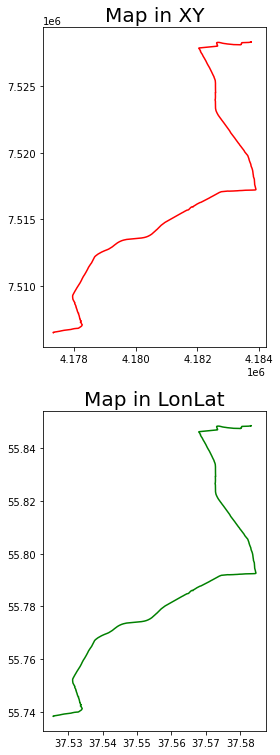

In [3]:
f=plt.figure()
f.set_figwidth(4)
f.set_figheight(20)

cy = []
cx = []
#cxx = []
#cyy=[]
R = 6378137  # Radius of earth in M

for i in range(len(longitude)):
    cy.append(math.log(math.tan(math.pi / 4 + math.radians(latitude[i]) / 2)) * R)
    cx.append(math.radians(longitude[i]) * R)
    #if bearing[i]==0:
        #cyy.append(latitude[i])
        #cxx.append(longitude[i])
        
        

plt.subplot(311)
plt.plot(cx,cy,'r')
plt.title('Map in XY', fontsize=20)

plt.subplot(312)
plt.plot(longitude,latitude,'g')
plt.title('Map in LonLat', fontsize=20)

#plt.subplot(313)
#plt.scatter(cxx,cyy)

# Разминка 2

In [4]:
time_OBD =[]
speed_OBD = []
time_GPS = []
speed_GPS = []  

c=0


with open('data1.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if c>1:
            if row[16] != '-':
                time_OBD.append(str(row[1])[12:])
                speed_OBD.append(float(row[13]))
                time_GPS.append(str(row[0])[11:19])
                speed_GPS.append(float(row[16]))
            
        c+=1


In [5]:
scaler = MinMaxScaler()

In [6]:
speed_OBD_1 = np.array([scaler.fit_transform(np.expand_dims(speed_OBD,axis = 1))])
speed_GPS_1 = np.array([scaler.fit_transform(np.expand_dims(speed_GPS,axis = 1))])
print(type(speed_OBD_1))
print(np.shape(speed_OBD_1))

<class 'numpy.ndarray'>
(1, 22260, 1)


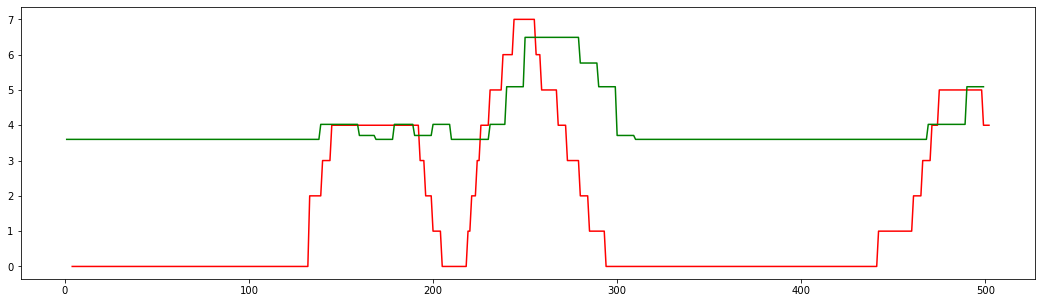

In [7]:
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(5)

plt.subplot(121)
plt.plot([i for i in range(len(time_OBD))][4:503], speed_OBD[4:503],'r')
plt.plot([i for i in range(len(time_GPS))][1:500], speed_GPS[1:500],'g')

Text(0.5, 1.0, 'Bearing(t)')

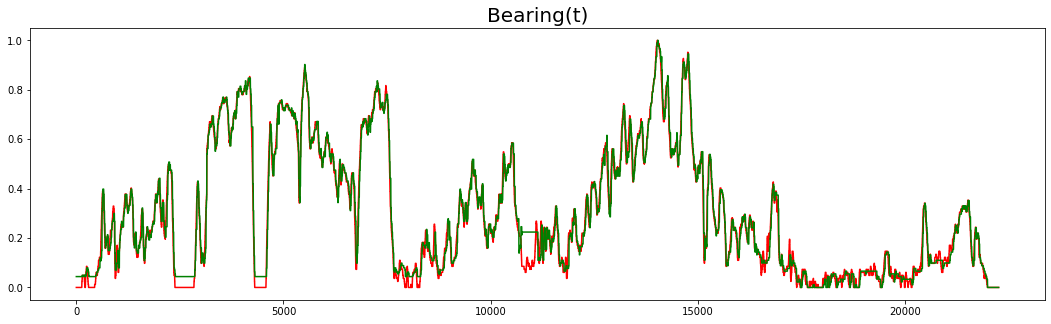

In [8]:
f=plt.figure()
f.set_figwidth(40)
f.set_figheight(5)

plt.subplot(121)
plt.plot([i for i in range(len(time_OBD))], speed_OBD_1[0,::,0],'r')
plt.plot([i for i in range(len(time_GPS))], speed_GPS_1[0,::,0],'g')
plt.title('Bearing(t)', fontsize=20)

# Разминка 3

In [9]:
time_GPS = []
speed_GPS = []  
bearing = []
c=0


with open('data1.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if c>1:
            if row[16] != '-':
                time_GPS.append(str(row[0])[11:19])
                speed_GPS.append(float(row[16]))
                bearing.append(float(row[7]))
        c+=1


Text(0.5, 1.0, 'Bearing(t)')

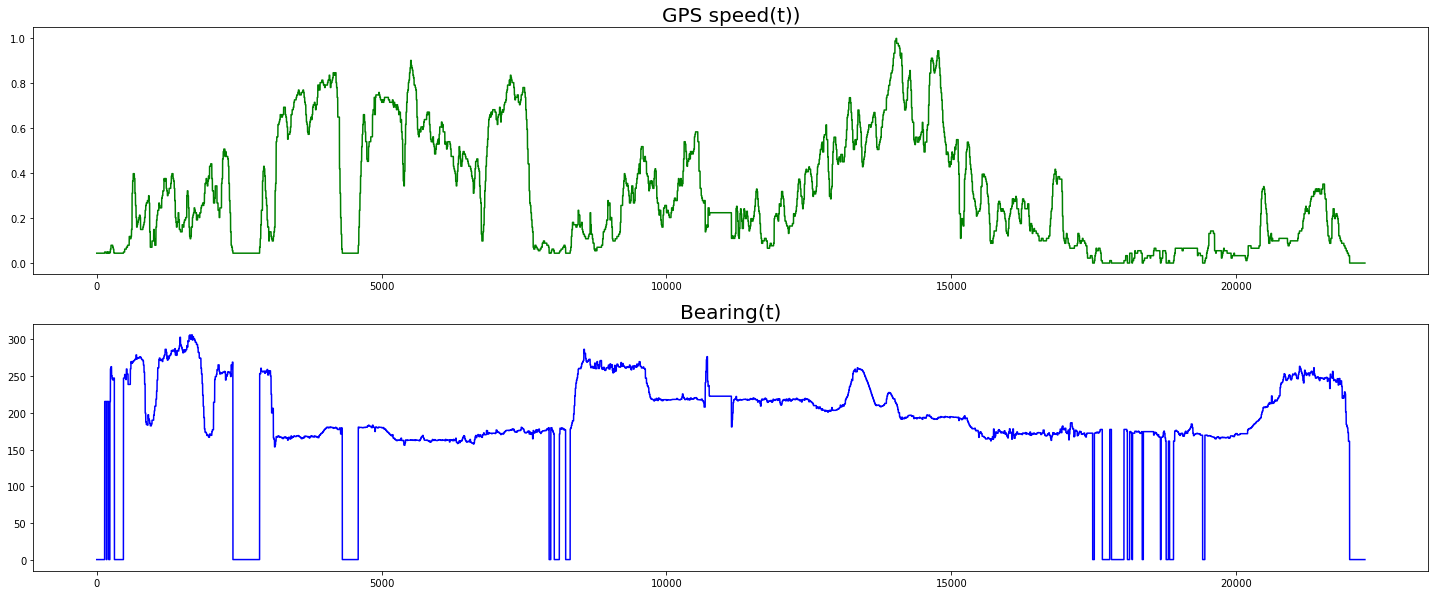

In [10]:
f=plt.figure()
f.set_figwidth(25)
f.set_figheight(10)

plt.subplot(211)
plt.plot([i for i in range(len(time_GPS))], speed_GPS_1[0,::,0],'g')
plt.title('GPS speed(t))',fontsize=20)

plt.subplot(212)
plt.plot([i for i in range(len(time_GPS))],bearing,'b')
plt.title('Bearing(t)', fontsize=20)

In [11]:
velx = []
vely = []
for i in range(len(bearing)):
    V = speed_GPS[i]
    Vx = V*math.cos(bearing[i])
    Vy = V*math.sin(bearing[i])
    velx.append(Vx)
    vely.append(Vy)


Text(0.5, 1.0, 'vely(t)')

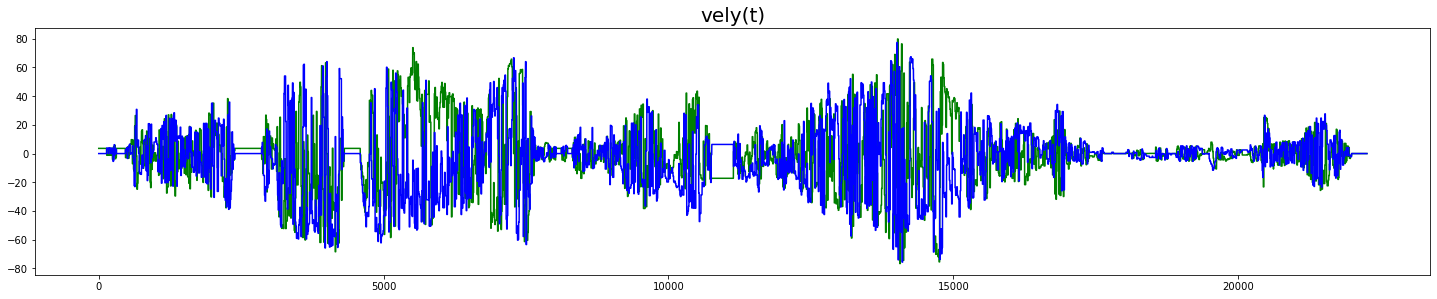

In [12]:
#глабольно вообще ничего не дает, 
#но вероятно если умножать скорость на время, то можно получить карту, если строить v(t) напрвленно

f=plt.figure()
f.set_figwidth(25)
f.set_figheight(10)

plt.subplot(211)
plt.plot([i for i in range(len(time_GPS))], velx,'g')
plt.title('velx(t))',fontsize=20)

plt.plot([i for i in range(len(time_GPS))],vely,'b')
plt.title('vely(t)', fontsize=20)

# ВАААА ЭТО ЖЕ МОЖНО КРУТО В ПОЛЯРНЫХ ПОСТРОИТЬ, ТОЛЬКО ЩАС ПРИДУМАЛА. Разложить получилось, а угол и вектор будут нарисуют что-то
# Мб, если вечером не умру,попробую сделать

In [521]:
def predict(mu1, var1, mu2, var2):
    var = var1 + var2
    mu = mu1 + mu2
    return mu, var

def update(mu1, var1, mu2, var2):
    var = 1 / (1 / var1 + 1 / var2)
    mu = (mu1 * var2 + mu2 * var1) / (var1 + var2)
    return mu, var    

In [576]:
time_OBD =[]
speed_OBD = []
time_GPS = []
speed_GPS = []  

c=0

with open('data1.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if c>1:
            if row[16] != '-':
                time_OBD.append(str(row[1])[12:])
                speed_OBD.append(float(row[13]))
                time_GPS.append(str(row[0])[11:19])
                speed_GPS.append(float(row[16]))
        c+=1


In [659]:
correction =[]

#GPS = [speed_GPS[0]]
#OBD = [speed_OBD[0]]
mu, sigma = 0, 80.

ksi_GPS = 10
ksi_OBD = 2
#motions = 0.
#motion_sigma = 3.
#time_OBD1 = time_OBD[74::]
#speed_OBD1 = speed_OBD[74::]
#print(len(speed_OBD1),len(time_GPS)-74)
#time_GPS1 = time_GPS[1:-73:]
#speed_GPS1 = speed_GPS[1:-73:]
v=1
v_sigma = 2
v_m=[]
#upd = []
#meas_GPS = [speed_GPS[0]]

v_sigma = 2
v = 1 
    
t2 = 1
for t in range(1,len(time_GPS),t2):
    
    mu, sigma = predict(mu, sigma, v, v_sigma)
    
    meas_GPS, meas_OBD = speed_GPS[t-1], speed_OBD[t-1] 
    
    mu2, sigma2 = update(meas_OBD, ksi_OBD, meas_GPS, ksi_GPS)

    mu, sigma = update(mu, sigma, mu2, sigma2)
    
    correction.append(mu)
    
print(len(speed_OBD1), len(speed_OBD1))
print(len([i for i in range(len(time_GPS)-74)]))

22186 22186
22186


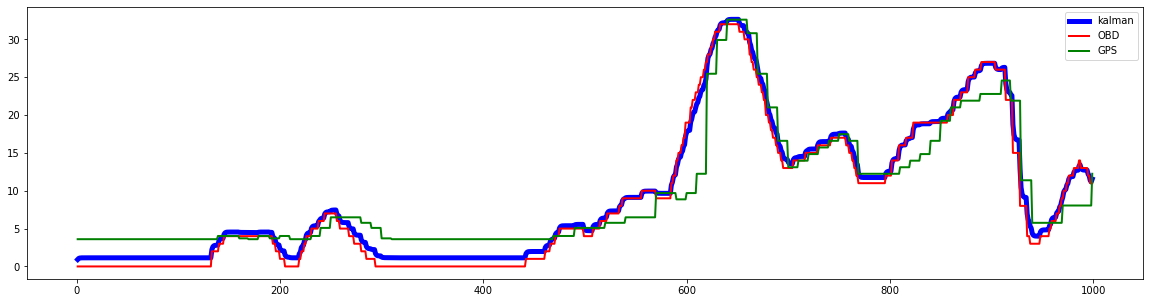

In [664]:
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
t = 1000
t1 = 1
plt.plot([i for i in range(len(time_GPS))][t1:t:t2], correction[t1//t2:t//t2:], label='kalman', c='b',linewidth = 5)
plt.plot([i for i in range(len(time_GPS))][t1:t:t2], speed_OBD[t1:t:t2], label='OBD', c='r', linewidth = 2)
#plt.plot([i for i in range(len(time_GPS))][t1:t:t2], v_m[t1:t:t2], label='V', c='m', linewidth = 5)
plt.plot([i for i in range(len(time_GPS))][t1:t:t2], speed_GPS[t1:t:t2], label='GPS', c='g', linewidth = 2)

#plt.plot([i for i in range(len(time_GPS))][t1:t:t2], OBD[t1//t2:t//t2:], label='OBD1', c='m', linewidth = 1)
#plt.plot([i for i in range(len(time_GPS))][t1:t:t2], GPS[t1//t2:t//t2:], label='GPS1', c='k', linewidth = 1)

plt.legend()

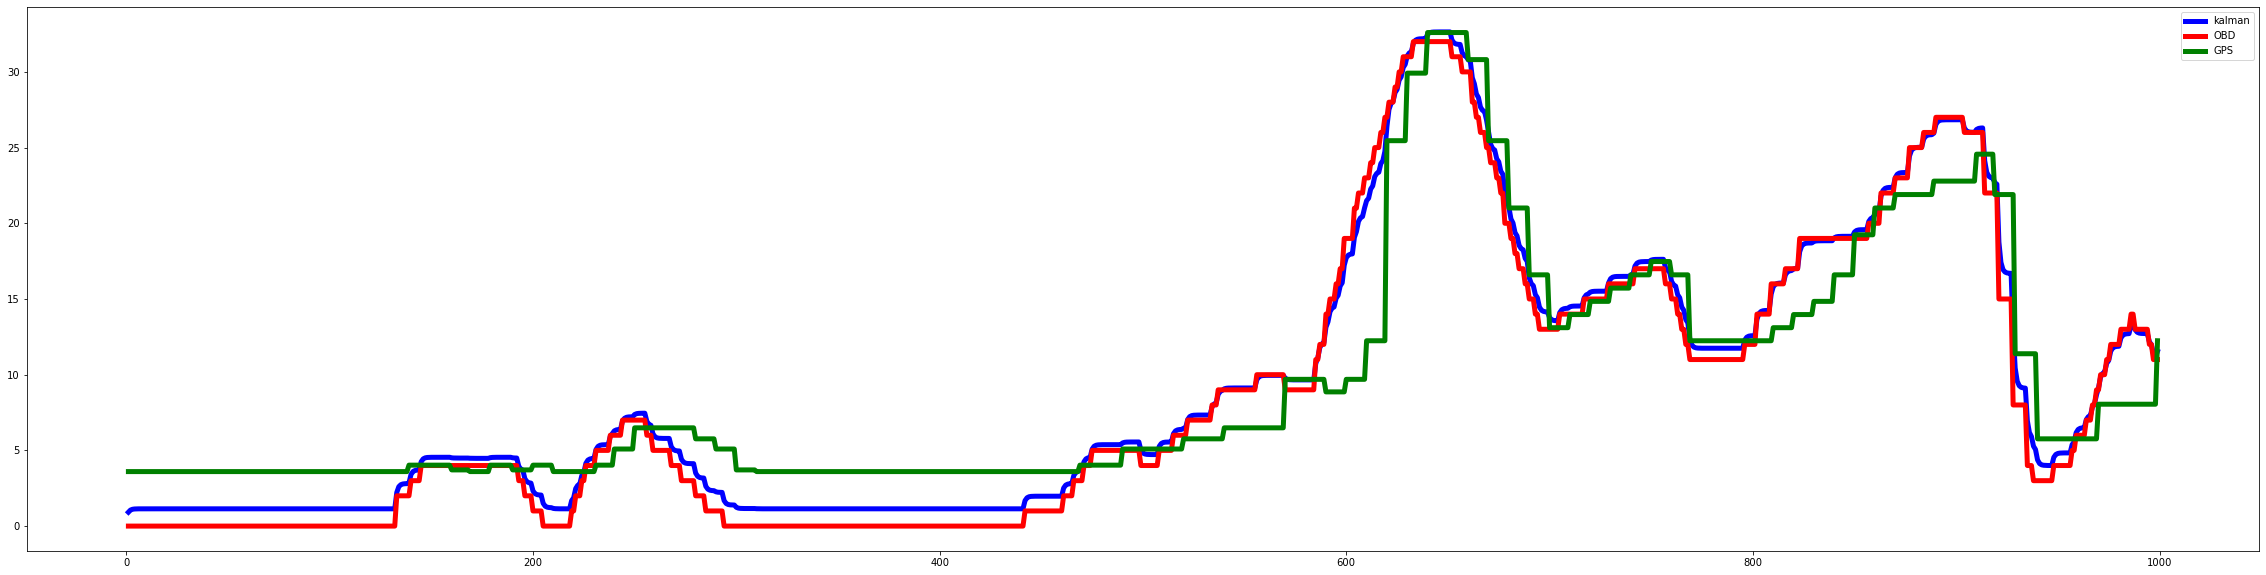

In [665]:
def printg(t,t1,t2,time_GPS,correction,speed_OBD,speed_GPS):
    f=plt.figure()
    f.set_figwidth(40)
    f.set_figheight(10)
    plt.plot([i for i in range(len(time_GPS))][t1:t:t2], correction[t1//t2:t//t2:], label='kalman', c='b',linewidth = 5)
    plt.plot([i for i in range(len(time_GPS))][t1:t:t2], speed_OBD[t1:t:t2], label='OBD', c='r', linewidth = 5)
    plt.plot([i for i in range(len(time_GPS))][t1:t:t2], speed_GPS[t1:t:t2], label='GPS', c='g', linewidth = 5)
    plt.legend()
printg(1000,1,t2,time_GPS,correction,speed_OBD,speed_GPS)

# пропадание данных GPS

In [61]:
time_OBD =[]
speed_OBD = []
time_GPS = []
speed_GPS = []  

c=0

with open('data1.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if c>1:
            if row[16] != '-':
                time_OBD.append(str(row[1])[12:])
                speed_OBD.append(float(row[13]))
                time_GPS.append(str(row[0])[11:19])
                if row[0][14:16] > '25' and row[0][14:16] < '35':
                       speed_GPS.append(float(0))
                else:
                    speed_GPS.append(float(row[16]))
            
        c+=1


22260 22260
17:55:21.657 17:55:28


22186 22186


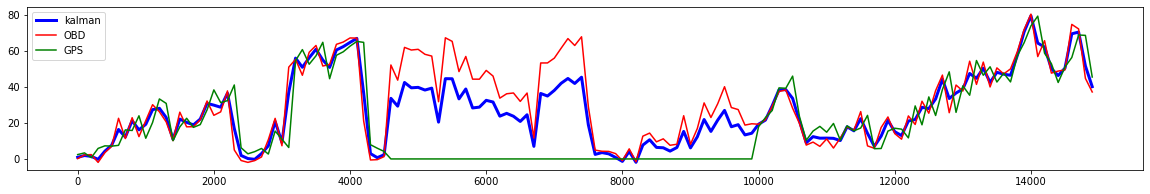

In [86]:
correction =[]

GPS = []
OBD = []
mu, sigma = 0, 80.
 
ksi_GPS = 4.
ksi_OBD = 2.
#motions = 0.
#motion_sigma = 3.
#time_OBD1 = time_OBD[74::]
speed_OBD1 = speed_OBD[74::]
print(len(speed_OBD1),len(time_GPS)-74)
#time_GPS1 = time_GPS[1:-73:]
speed_GPS1 = speed_GPS[1:-73:]
t2 = 100
for t in range(1,len(time_GPS)-74,t2):
    
    v_sigma = 3.*(t/10)
    v = mu/(t/10) + np.random.uniform(-v_sigma,v_sigma)
    mu, sigma = predict(mu, sigma, v, v_sigma)
    
    meas_GPS = 0. if speed_GPS1[t] == 0. else speed_GPS1[t-1] + np.random.uniform(-ksi_GPS, ksi_GPS)
    mu, sigma = update(mu, sigma, meas_GPS, ksi_GPS)
    GPS.append(meas_GPS)

    meas_OBD = speed_OBD1[t-1] + np.random.uniform(-ksi_OBD, ksi_OBD)
    mu, sigma = update(mu, sigma, meas_OBD, ksi_OBD)
    OBD.append(meas_OBD)
    
    correction.append(mu)
    
printg(1000,1,t2,time_GPS,correction,speed_OBD,speed_GPS)

# пропадание данных OBD

In [105]:
time_OBD =[]
speed_OBD = []
time_GPS = []
speed_GPS = []  

c=0

with open('data1.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if c>1:
            if row[16] != '-':
                time_OBD.append(str(row[1])[12:])
                time_GPS.append(str(row[0])[11:19])
                speed_GPS.append(float(row[16]))
                if row[1][15:17] > '40' and row[1][15:17] < '50':
                       speed_OBD.append(float(0))
                else:
                    speed_OBD.append(float(row[16]))
            
        c+=1


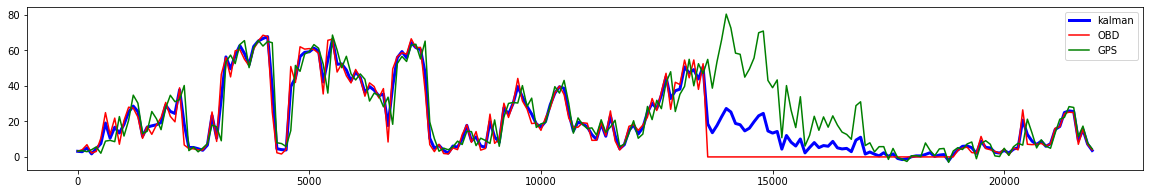

In [108]:
correction =[]

GPS = []
OBD = []
mu, sigma = 0, 80.
 
ksi_GPS = 4.
ksi_OBD = 2.

speed_OBD1 = speed_OBD[74::]

speed_GPS1 = speed_GPS[1:-73:]
t2 = 100

for t in range(1,len(time_GPS)-74,t2):
    
    v_sigma = 3.*(t/10)
    v = mu/(t/10) + np.random.uniform(-v_sigma,v_sigma)
    mu, sigma = predict(mu, sigma, v, v_sigma)
    
    meas_GPS = speed_GPS1[t-1] + np.random.uniform(-ksi_GPS, ksi_GPS)
    mu, sigma = update(mu, sigma, meas_GPS, ksi_GPS)
    GPS.append(meas_GPS)

    meas_OBD = 0. if speed_OBD1[t] == 0. else speed_OBD1[t-1] + np.random.uniform(-ksi_OBD, ksi_OBD)
    mu, sigma = update(mu, sigma, meas_OBD, ksi_OBD)
    OBD.append(meas_OBD)
    
    correction.append(mu)
    
printg(22000,1,t2,time_GPS,correction,OBD,GPS)

'55'

In [505]:
mu, sigma = predict(mu, sigma, v, v_sigma)